<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/Gradient_BoostingAnd_XGBoost/GradientBoosting_and_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Gradient Boosting?

Gradient Boosting is an ensemble technique that builds a strong model by combining many weak models (decision trees) sequentially.
Each new tree corrects the mistakes of the previous trees by focusing more on the errors (residuals).


## Step-by-Step Idea

1. Start with a simple model (like a small decision tree).

2. Check the errors (residuals) between predictions and actual values.

3. Train the next tree to predict these residuals (the mistakes).

4. Add this new tree’s prediction to improve the overall model.

5. Repeat until error becomes small or trees reach a limit.

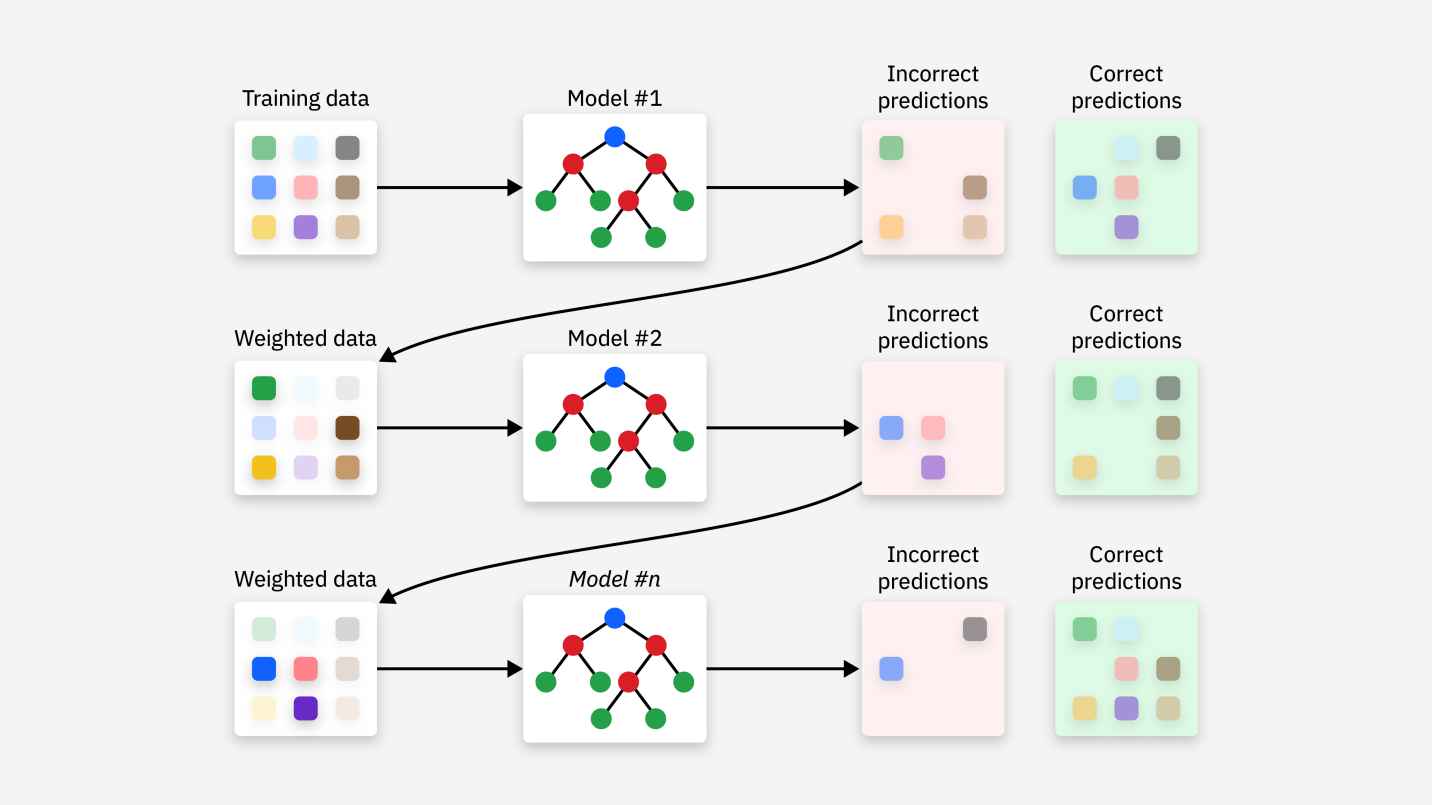



We want to predict **Marks (y)** from **Study Hours (x)**

| Student | Study Hours (x) | Actual Marks (y) |
| ------- | --------------- | ---------------- |
| A       | 2               | 30               |
| B       | 4               | 50               |
| C       | 6               | 70               |
| D       | 8               | 90               |



## 🔹 Round 0: Initial Prediction

Baseline = **mean(y) = 60** for all.

| Student | Actual y | Pred ŷ₀ | Residual R₁ = y − ŷ₀ |
| ------- | -------- | ------- | -------------------- |
| A       | 30       | 60      | -30                  |
| B       | 50       | 60      | -10                  |
| C       | 70       | 60      | +10                  |
| D       | 90       | 60      | +30                  |



## 🔹 Round 1: First Tree (fit R₁)

Tree splits:

* If hours ≤ 4 → average residual = (-30, -10) = -20
* If hours ≥ 6 → average residual = (+10, +30) = +20

So **Tree₁ correction = {-20, -10, +10, +20}**

Update predictions:

| Student | Old Pred (60) | Tree₁ Correction | New Pred ŷ₁ |
| ------- | ------------- | ---------------- | ----------- |
| A       | 60            | -20              | 40          |
| B       | 60            | -10              | 50          |
| C       | 60            | +10              | 70          |
| D       | 60            | +20              | 80          |

New residuals:

$$
R_2 = y - \hat{y}_1
$$

| Student | Actual y | New Pred ŷ₁ | Residual R₂ |
| ------- | -------- | ----------- | ----------- |
| A       | 30       | 40          | -10         |
| B       | 50       | 50          | 0           |
| C       | 70       | 70          | 0           |
| D       | 90       | 80          | +10         |



## 🔹 Round 2: Second Tree (fit R₂)

Tree splits:

* If hours ≤ 2 → average residual = -10
* If hours ≥ 8 → average residual = +10
* Others = 0

So **Tree₂ correction = {-10, 0, 0, +10}**

Update predictions:

| Student | Old Pred ŷ₁ | Tree₂ Correction | New Pred ŷ₂ |
| ------- | ----------- | ---------------- | ----------- |
| A       | 40          | -10              | 30          |
| B       | 50          | 0                | 50          |
| C       | 70          | 0                | 70          |
| D       | 80          | +10              | 90          |

New residuals:

| Student | Actual y | New Pred ŷ₂ | Residual R₃ |
| ------- | -------- | ----------- | ----------- |
| A       | 30       | 30          | 0           |
| B       | 50       | 50          | 0           |
| C       | 70       | 70          | 0           |
| D       | 90       | 90          | 0           |



## 🔹 Round 3: Stop

Residuals are **all zero**
So no more trees are needed.



##  Final Summary

* Round 0 (mean) → predictions (60, 60, 60, 60) with big errors.
* Round 1 → corrected to (40, 50, 70, 80).
* Round 2 → corrected to (30, 50, 70, 90).
* Round 3 → residuals = 0 → **perfect prediction!**

This shows exactly how Gradient Boosting keeps **reducing residuals step by step** until the model fits the data well.


# Implement Gradient Boosting

In [1]:
# import libery
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)


In [4]:
# step 1: dataset with feature X input and Y target
dataframe = pd.DataFrame()
dataframe['X'] = X.reshape(100)
dataframe['y'] = y

In [5]:
dataframe

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


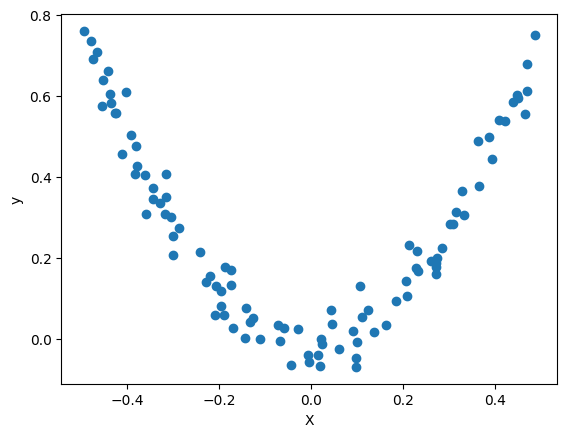

In [6]:
plt.scatter(dataframe['X'], dataframe['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

If dataset show parabola then used XGBoost or Graident Boosting

In [11]:
# step 2: target means
dataframe['predict_1'] = dataframe['y'].mean()
dataframe

,X,y,predict_1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [12]:
# step 3: residual_1
dataframe['residual_1'] = dataframe['y'] - dataframe['predict_1']
dataframe

,X,y,predict_1,residual_1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


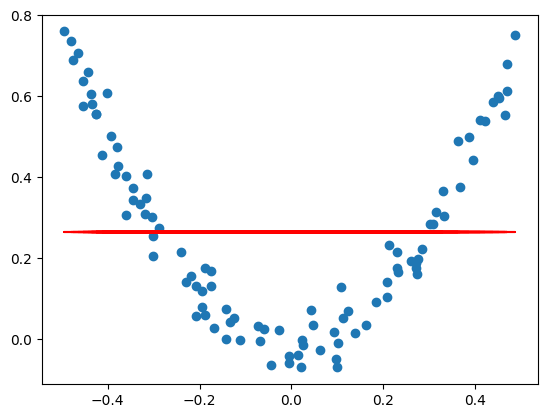

In [15]:
plt.scatter(dataframe['X'], dataframe['y'])
plt.plot(dataframe['X'], dataframe['predict_1'], color='red')

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree1_model = DecisionTreeRegressor(max_leaf_nodes=8)
tree1_model.fit(dataframe['X'].values.reshape(100,1), dataframe['residual_1'].values )

DecisionTreeRegressor(max_leaf_nodes=8)

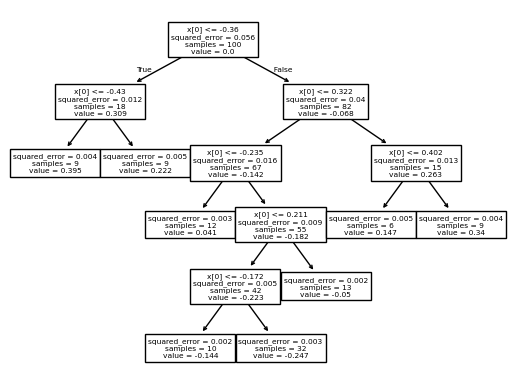

In [22]:
# tree represent
from sklearn.tree import plot_tree
plot_tree(tree1_model)
plt.show()

In [23]:
X_test = np.linspace(-0.5, 0.5, 500)
X_test

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

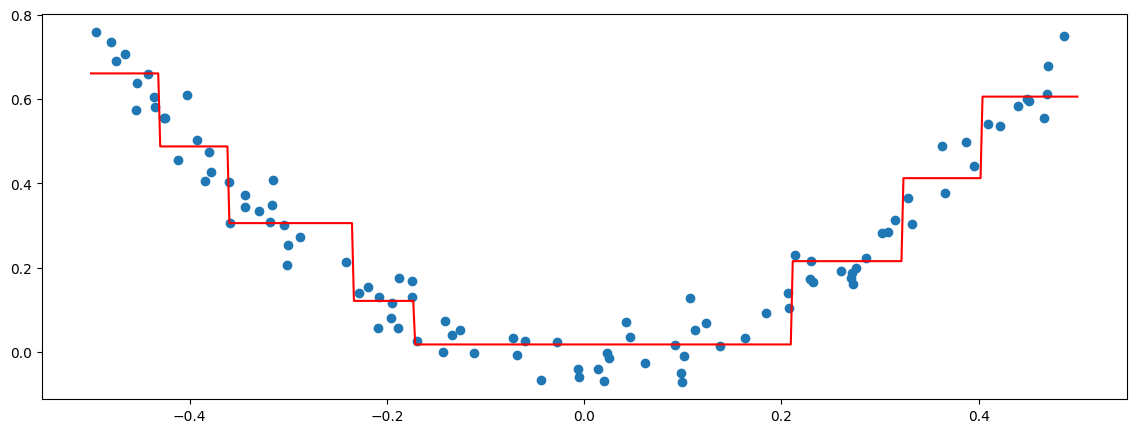

In [26]:
y_pred = 0.265458 + tree1_model.predict(X_test.reshape(500,1)) # combined result of model m1 and model m2


plt.figure(figsize=(14, 5))
plt.plot(X_test, y_pred, color='red')
plt.scatter(dataframe['X'], dataframe['y'])

In [27]:
dataframe['pred2'] = 0.265458 + 0.1 * tree1_model.predict(dataframe['X'].values.reshape(100, 1)) # to avoid the overfitting
dataframe

,X,y,predict_1,residual_1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.240744
1,0.450714,0.594480,0.265458,0.329021,0.299501
2,0.231994,0.166052,0.265458,-0.099407,0.260491
3,0.098658,-0.070178,0.265458,-0.335636,0.240744
4,-0.343981,0.343986,0.265458,0.078528,0.269509
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.240744
96,0.022733,-0.002305,0.265458,-0.267763,0.240744
97,-0.072459,0.032809,0.265458,-0.232650,0.240744
98,-0.474581,0.689516,0.265458,0.424057,0.305003


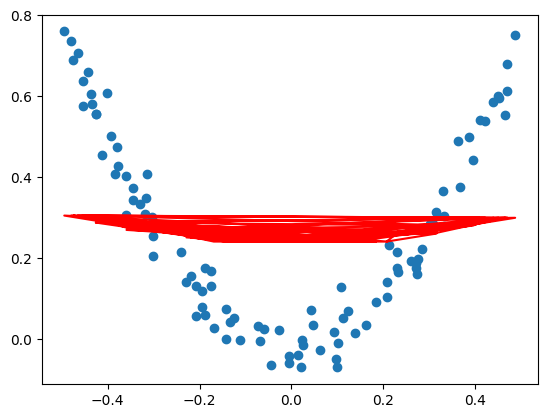

In [28]:
plt.scatter(dataframe['X'], dataframe['y'])
plt.plot(dataframe['X'], dataframe['pred2'], color='red')